# Laboratorio 1 - Visión por Computadora
## Integrantes:

- Javier Alvarado - 21188
- Mario Guerra - 21008
- Emilio Solano - 21212


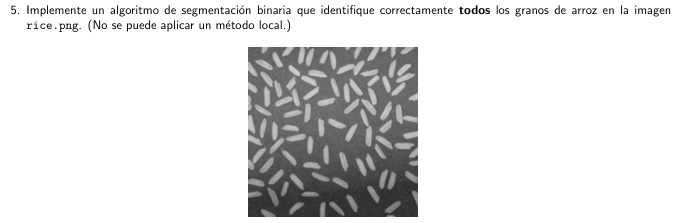

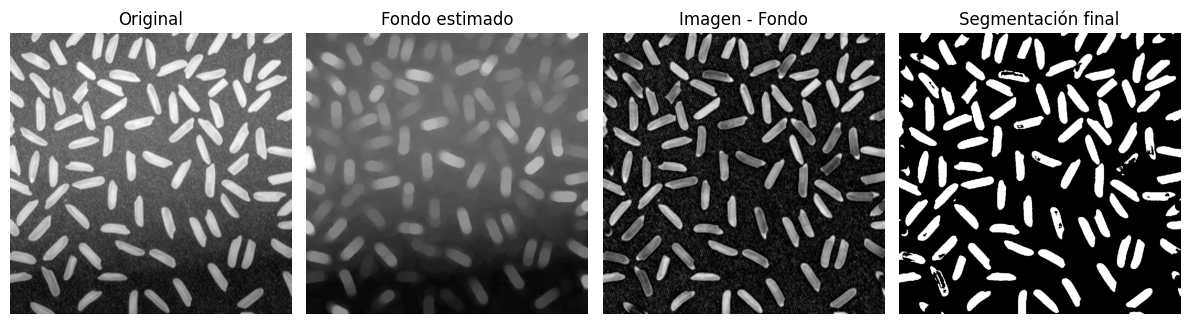

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io, filters, morphology
from skimage.color import rgb2gray

img = io.imread('./assets/rice.jpg')
if len(img.shape) == 3:
    img_gray = rgb2gray(img)
else:
    img_gray = img


selem = morphology.disk(15)
bg = morphology.opening(img_gray, selem)

img_sub = img_gray - bg

# Metodo Global OTSU
thresh_val = filters.threshold_otsu(img_sub)
binary = img_sub > thresh_val


binary_clean = morphology.remove_small_objects(binary, min_size=20)
binary_clean = morphology.remove_small_holes(binary_clean, area_threshold=20)

# Visualización de resultados
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(bg, cmap='gray')
axes[1].set_title('Fondo estimado')
axes[2].imshow(img_sub, cmap='gray')
axes[2].set_title('Imagen - Fondo')
axes[3].imshow(binary_clean, cmap='gray')
axes[3].set_title('Segmentación final')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()
